In [1]:
# list of dependencies
import pandas as pd
from datetime import datetime as dt
import sqlalchemy

In [2]:
# read csv file data and check top 5 of the data
# df = pd.read_csv('path data file')
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')
df.head()

/var/folders/lv/pfb0ksdd4ks3hpfq2kj7_5sh0000gq/T/ipykernel_34452/3962988721.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [3]:
# check length of the data
len(df)

2076252

In [4]:
# check coloumn and type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076252 entries, 0 to 2076251
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [5]:
# check null data 
df.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           646011
ZIP CODE                          646261
LATITUDE                          233688
LONGITUDE                         233688
LOCATION                          233688
ON STREET NAME                    440794
CROSS STREET NAME                 784860
OFF STREET NAME                  1727831
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6809
CONTRIBUTING FACTOR VEHICLE 2     321936
CONTRIBUTING FACTOR VEHICLE 3    1927903
CONTRIBUTING FACTOR VEHICLE 4    2042754
CONTRIBUTING FACTOR VEHICLE 5    2067177
COLLISION_ID                           0
VEHICLE TYPE COD

TRANSFORM DATA

In [6]:
# function to transform coloumn name into snakecase (coloumn_name)
def to_snake_case(column_name):
    return column_name.replace(' ','_').lower()

df.rename(columns=lambda x: to_snake_case(x), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076252 entries, 0 to 2076251
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   crash_date                     object 
 1   crash_time                     object 
 2   borough                        object 
 3   zip_code                       object 
 4   latitude                       float64
 5   longitude                      float64
 6   location                       object 
 7   on_street_name                 object 
 8   cross_street_name              object 
 9   off_street_name                object 
 10  number_of_persons_injured      float64
 11  number_of_persons_killed       float64
 12  number_of_pedestrians_injured  int64  
 13  number_of_pedestrians_killed   int64  
 14  number_of_cyclist_injured      int64  
 15  number_of_cyclist_killed       int64  
 16  number_of_motorist_injured     int64  
 17  number_of_motorist_killed      int64  
 18  co

In [7]:
# transform column crash_date into datetime
df['crash_date'] = pd.to_datetime(df['crash_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076252 entries, 0 to 2076251
Data columns (total 29 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   crash_date                     datetime64[ns]
 1   crash_time                     object        
 2   borough                        object        
 3   zip_code                       object        
 4   latitude                       float64       
 5   longitude                      float64       
 6   location                       object        
 7   on_street_name                 object        
 8   cross_street_name              object        
 9   off_street_name                object        
 10  number_of_persons_injured      float64       
 11  number_of_persons_killed       float64       
 12  number_of_pedestrians_injured  int64         
 13  number_of_pedestrians_killed   int64         
 14  number_of_cyclist_injured      int64         
 15  number_of_cycli

In [8]:
# convert crash_time type into time and get the hour only
df['crash_time'] = pd.to_datetime(df['crash_time'], format='%H:%M').dt.hour
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076252 entries, 0 to 2076251
Data columns (total 29 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   crash_date                     datetime64[ns]
 1   crash_time                     int32         
 2   borough                        object        
 3   zip_code                       object        
 4   latitude                       float64       
 5   longitude                      float64       
 6   location                       object        
 7   on_street_name                 object        
 8   cross_street_name              object        
 9   off_street_name                object        
 10  number_of_persons_injured      float64       
 11  number_of_persons_killed       float64       
 12  number_of_pedestrians_injured  int64         
 13  number_of_pedestrians_killed   int64         
 14  number_of_cyclist_injured      int64         
 15  number_of_cycli

In [9]:
# drop row that 'contributing_factor_vehicle_1' is na
new_df = df[df['contributing_factor_vehicle_1'].notna()]

In [10]:
new_df.head()

,crash_date,crash_time,borough,zip_code,latitude,longitude,location,on_street_name,cross_street_name,off_street_name,...,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,collision_id,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,2021-09-11,2,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,2022-03-26,11,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,2022-06-29,6,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,2021-09-11,9,BROOKLYN,11208.0,40.667202,-73.8665,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
5,2021-04-14,12,NaN,NaN,NaN,NaN,NaN,MAJOR DEEGAN EXPRESSWAY RAMP,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407458,Dump,Sedan,NaN,NaN,NaN


In [11]:
new_df.isnull().sum()

crash_date                             0
crash_time                             0
borough                           644452
zip_code                          644701
latitude                          233084
longitude                         233084
location                          233084
on_street_name                    439124
cross_street_name                 782453
off_street_name                  1722495
number_of_persons_injured             15
number_of_persons_killed              25
number_of_pedestrians_injured          0
number_of_pedestrians_killed           0
number_of_cyclist_injured              0
number_of_cyclist_killed               0
number_of_motorist_injured             0
number_of_motorist_killed              0
contributing_factor_vehicle_1          0
contributing_factor_vehicle_2     315127
contributing_factor_vehicle_3    1921094
contributing_factor_vehicle_4    2035945
contributing_factor_vehicle_5    2060368
collision_id                           0
vehicle_type_cod

In [12]:
# create a new data to load on db based on the columns needed
df_final = df[['collision_id', 'crash_date', 'crash_time', 'borough', 'latitude', 'longitude',
                'on_street_name', 'number_of_persons_injured', 'number_of_persons_killed', 
                'number_of_pedestrians_injured', 'number_of_pedestrians_killed',
                'number_of_cyclist_injured', 'number_of_cyclist_killed', 'number_of_motorist_injured',
                'number_of_motorist_killed', 'contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
                'contributing_factor_vehicle_3', 'contributing_factor_vehicle_4', 'contributing_factor_vehicle_5',
                'vehicle_type_code_1', 'vehicle_type_code_2', 'vehicle_type_code_3', 'vehicle_type_code_4',
                'vehicle_type_code_5']]

In [13]:
df_final.head()

,collision_id,crash_date,crash_time,borough,latitude,longitude,on_street_name,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,...,contributing_factor_vehicle_1,contributing_factor_vehicle_2,contributing_factor_vehicle_3,contributing_factor_vehicle_4,contributing_factor_vehicle_5,vehicle_type_code_1,vehicle_type_code_2,vehicle_type_code_3,vehicle_type_code_4,vehicle_type_code_5
0,4455765,2021-09-11,2,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,2.0,0.0,0,...,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,Sedan,Sedan,NaN,NaN,NaN
1,4513547,2022-03-26,11,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,1.0,0.0,0,...,Pavement Slippery,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
2,4541903,2022-06-29,6,NaN,NaN,NaN,THROGS NECK BRIDGE,0.0,0.0,0,...,Following Too Closely,Unspecified,NaN,NaN,NaN,Sedan,Pick-up Truck,NaN,NaN,NaN
3,4456314,2021-09-11,9,BROOKLYN,40.667202,-73.866500,NaN,0.0,0.0,0,...,Unspecified,NaN,NaN,NaN,NaN,Sedan,NaN,NaN,NaN,NaN
4,4486609,2021-12-14,8,BROOKLYN,40.683304,-73.917274,SARATOGA AVENUE,0.0,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


EXPLORATORY DATA ANALYSIS

In [28]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np


Contributing Factor Analysis: Analyze the common factors contributing to collisions. This can help identify the leading causes of accidents and develop strategies to prevent them.

In [23]:
factor_analysis = df_final.groupby(['contributing_factor_vehicle_1'])[['number_of_persons_injured', 'number_of_persons_killed']].agg('sum').reset_index()

factor_analysis['total_accidents'] = df_final.groupby(['contributing_factor_vehicle_1']).size().reset_index(name='no_of_accidents').no_of_accidents

factor_analysis = factor_analysis.sort_values('total_accidents', ascending=False).head(10)

factor_analysis['injury%'] = round((factor_analysis['number_of_persons_injured']/factor_analysis['total_accidents'] * 100), 1)
factor_analysis['killed%'] = round((factor_analysis['number_of_persons_killed']/factor_analysis['total_accidents'] * 100), 1)

factor_analysis.head(10)


,contributing_factor_vehicle_1,number_of_persons_injured,number_of_persons_killed,total_accidents,injury%,killed%
56,Unspecified,180650.0,1009.0,706933,25.6,0.1
11,Driver Inattention/Distraction,137763.0,368.0,415442,33.2,0.1
18,Failure to Yield Right-of-Way,62818.0,269.0,123357,50.9,0.2
21,Following Too Closely,43006.0,23.0,110980,38.8,0.0
6,Backing Unsafely,9268.0,40.0,76758,12.1,0.1


In [25]:
# we can ignore the unspecified
factor_analysis = factor_analysis.head(10).iloc[1:]
factor_analysis.head(10)

,contributing_factor_vehicle_1,number_of_persons_injured,number_of_persons_killed,total_accidents,injury%,killed%
11,Driver Inattention/Distraction,137763.0,368.0,415442,33.2,0.1
18,Failure to Yield Right-of-Way,62818.0,269.0,123357,50.9,0.2
21,Following Too Closely,43006.0,23.0,110980,38.8,0.0
6,Backing Unsafely,9268.0,40.0,76758,12.1,0.1
32,Other Vehicular,16693.0,32.0,64431,25.9,0.0
37,Passing or Lane Usage Improper,11757.0,31.0,57886,20.3,0.1
36,Passing Too Closely,4398.0,3.0,51683,8.5,0.0
53,Turning Improperly,11345.0,18.0,51275,22.1,0.0
19,Fatigued/Drowsy,12390.0,3.0,47401,26.1,0.0


Text(0, 0.5, 'Number Of Accidents')

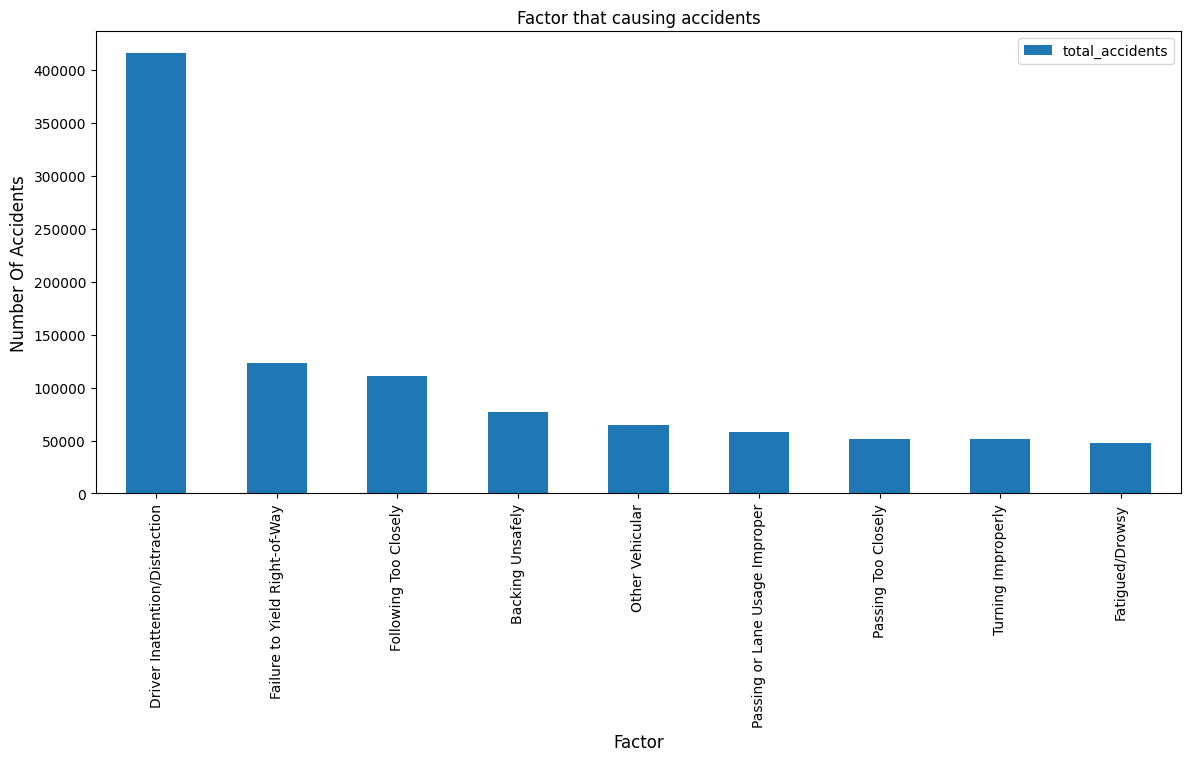

In [30]:
fig, ax = plt.subplots(1, figsize =(14, 6))

# color = np.flip(cm.red(np.linspace(.2, .6, 10)))

factor_analysis.plot(x = 'contributing_factor_vehicle_1',
                     y = 'total_accidents', kind = 'bar',
                     stacked=True, ax=ax)

ax.set_title('Factor that causing accidents', size = 12)
ax.set_xlabel('Factor', size = 12)
ax.set_ylabel('Number Of Accidents', size =12)


Analysis : Driver Distraction the most common factor leading to accident

In [46]:
factor_injured_rate = factor_analysis.sort_values('injury%', ascending=False).head(5)
factor_killed_rate = factor_analysis.sort_values('killed%', ascending=False).head(5)

Text(0, 0.5, 'Rate %')

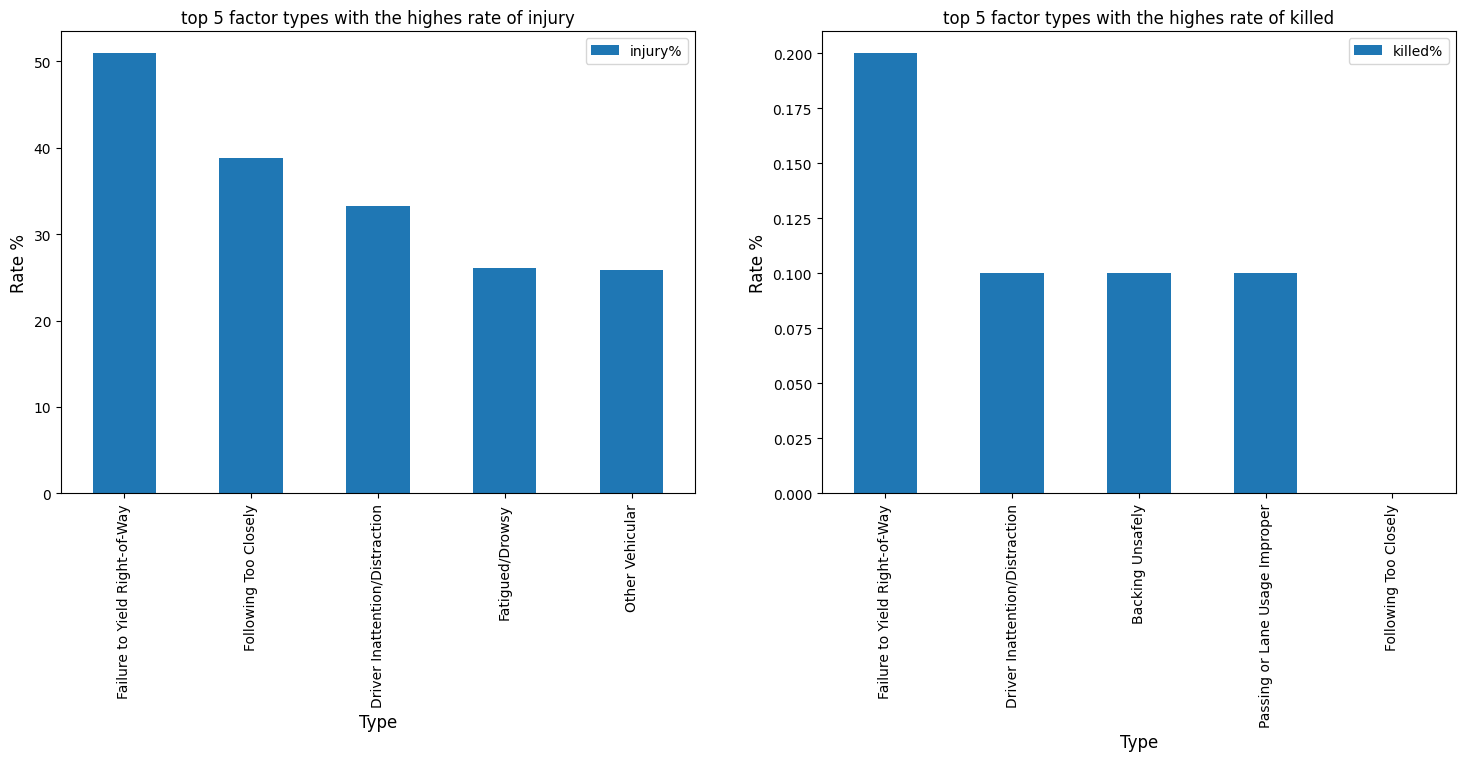

In [47]:
fig , (ax1, ax2) = plt.subplots(nrows= 1, ncols=2, figsize=(18,6))

color = np.flip(cm.plasma(np.linspace(.2,.6, 10)))
color2 = cm.autumn(np.linspace(.2,.6, 10))

factor_injured_rate.plot(x = 'contributing_factor_vehicle_1',
                     y = 'injury%', kind = 'bar',
                     stacked=True, ax=ax1)

factor_killed_rate.plot(x = 'contributing_factor_vehicle_1',
                     y = 'killed%', kind = 'bar',
                     stacked=True, ax=ax2)

ax1.set_title('top 5 factor types with the highes rate of injury', size = 12)
ax1.set_xlabel('Type', size = 12)
ax1.set_ylabel('Rate %', size =12)

ax2.set_title('top 5 factor types with the highes rate of killed', size = 12)
ax2.set_xlabel('Type', size = 12)
ax2.set_ylabel('Rate %', size =12)

Vehicle Type Safety Analysis: Analyze the safety of different types of vehicles. This can provide insights into which types of vehicles are involved in more accidents and which types of accidents result in more severe injuries.


In [31]:
vehicle_type_analysis = df_final.groupby(['vehicle_type_code_1'])[['number_of_persons_injured', 'number_of_persons_killed']].agg('sum').reset_index()

vehicle_type_analysis['total_accidents'] = df_final.groupby(['vehicle_type_code_1']).size().reset_index(name='no_of_accidents').no_of_accidents

vehicle_type_analysis = vehicle_type_analysis.sort_values('total_accidents', ascending=False).head(10)

vehicle_type_analysis['injury%'] = round((vehicle_type_analysis['number_of_persons_injured']/vehicle_type_analysis['total_accidents'] * 100), 1)
vehicle_type_analysis['killed%'] = round((vehicle_type_analysis['number_of_persons_killed']/vehicle_type_analysis['total_accidents'] * 100), 1)

vehicle_type_analysis.head(10)


,vehicle_type_code_1,number_of_persons_injured,number_of_persons_killed,total_accidents,injury%,killed%
1024,Sedan,198200.0,672.0,577041,34.3,0.1
1046,Station Wagon/Sport Utility Vehicle,152079.0,595.0,453809,33.5,0.1
813,PASSENGER VEHICLE,106857.0,398.0,416206,25.7,0.1
984,SPORT UTILITY / STATION WAGON,45622.0,218.0,180291,25.3,0.1
1119,Taxi,18734.0,46.0,51557,36.3,0.1
42,4 dr sedan,11320.0,28.0,40171,28.2,0.1
875,Pick-up Truck,8820.0,65.0,34696,25.4,0.2
1064,TAXI,8171.0,21.0,31911,25.6,0.1
1228,VAN,5320.0,37.0,25266,21.1,0.1
144,Box Truck,4088.0,61.0,24322,16.8,0.3


Text(0, 0.5, 'Number Of Accidents')

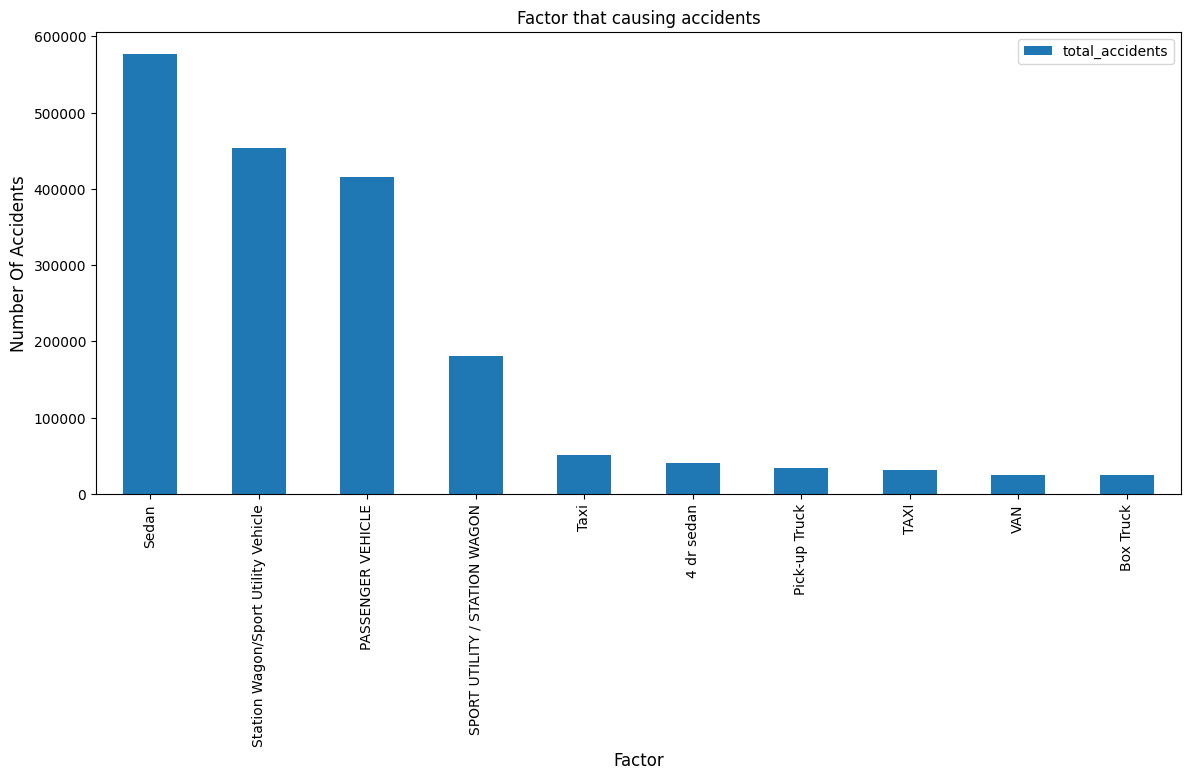

In [34]:
fig, ax = plt.subplots(1, figsize =(14, 6))

# color = np.flip(cm.red(np.linspace(.2, .6, 10)))

vehicle_type_analysis.plot(x = 'vehicle_type_code_1',
                     y = 'total_accidents', kind = 'bar',
                     stacked=True, ax=ax)

ax.set_title('Factor that causing accidents', size = 12)
ax.set_xlabel('Factor', size = 12)
ax.set_ylabel('Number Of Accidents', size =12)

analysis: sedan is the most type of vehicle that had accident

In [42]:
vehicle_injured_rate = vehicle_type_analysis.sort_values('injury%', ascending=False).head(5)
vehicle_killed_rate = vehicle_type_analysis.sort_values('killed%', ascending=False).head(5)

Text(0, 0.5, 'Rate %')

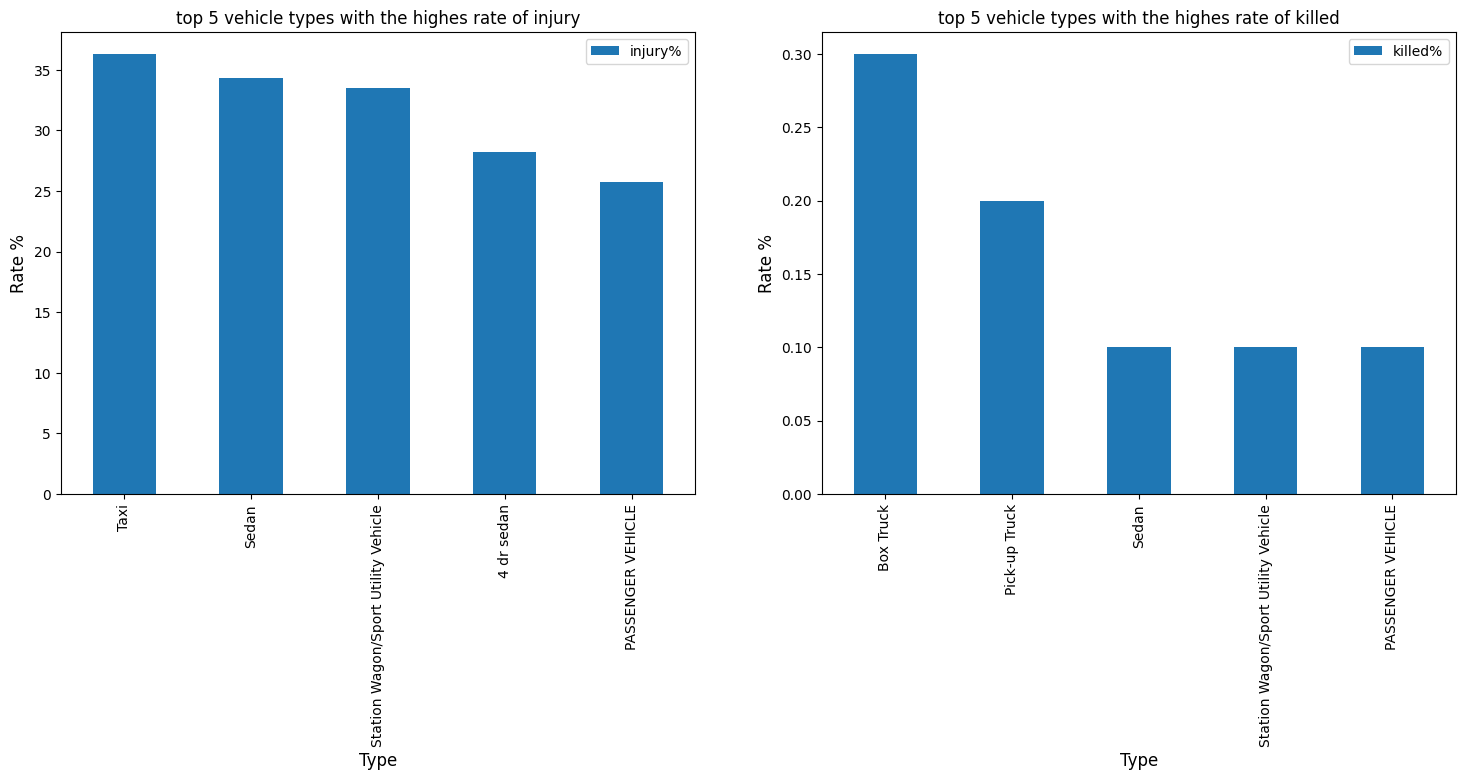

In [44]:
fig , (ax1, ax2) = plt.subplots(nrows= 1, ncols=2, figsize=(18,6))

color = np.flip(cm.plasma(np.linspace(.2,.6, 10)))
color2 = cm.autumn(np.linspace(.2,.6, 10))

vehicle_injured_rate.plot(x = 'vehicle_type_code_1',
                     y = 'injury%', kind = 'bar',
                     stacked=True, ax=ax1)

vehicle_killed_rate.plot(x = 'vehicle_type_code_1',
                     y = 'killed%', kind = 'bar',
                     stacked=True, ax=ax2)

ax1.set_title('top 5 vehicle types with the highes rate of injury', size = 12)
ax1.set_xlabel('Type', size = 12)
ax1.set_ylabel('Rate %', size =12)

ax2.set_title('top 5 vehicle types with the highes rate of killed', size = 12)
ax2.set_xlabel('Type', size = 12)
ax2.set_ylabel('Rate %', size =12)

In [87]:
time_hour_analysis = df_final.groupby(['crash_time']).size().reset_index(name='total_accidents')

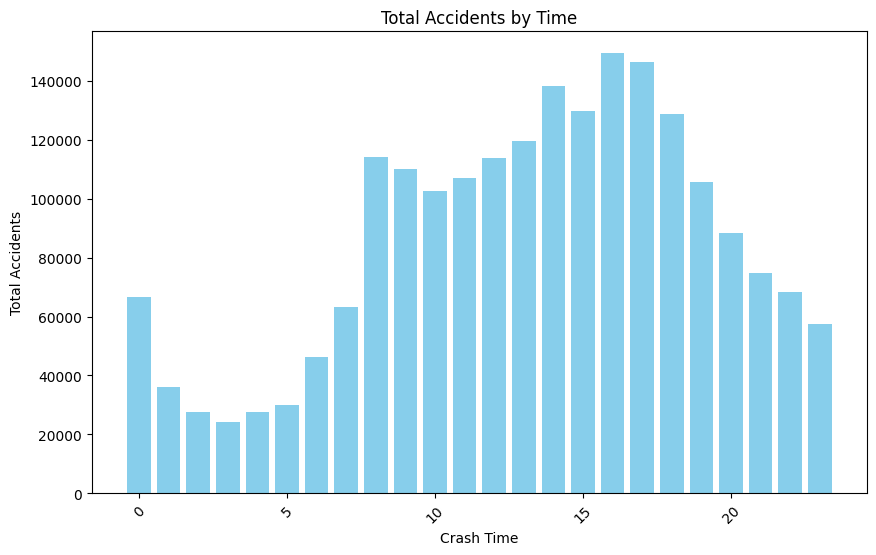

In [56]:
plt.figure(figsize=(10, 6))
plt.bar(time_hour_analysis['crash_time'], time_hour_analysis['total_accidents'], color='skyblue')
plt.xlabel('Crash Time')
plt.ylabel('Total Accidents')
plt.title('Total Accidents by Time') 
plt.xticks(rotation=45) 
plt.show()


analysis : on 13 - 18 is the most time that accident happened

In [64]:
df_final['day'] = df_final['crash_date'].dt.day_name()

/var/folders/lv/pfb0ksdd4ks3hpfq2kj7_5sh0000gq/T/ipykernel_34452/1316903964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['day'] = df_final['crash_date'].dt.day_name()


In [84]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

time_day_analysis = df_final.groupby('day').size().reset_index(name='total_accidents')

time_day_analysis['day'] = pd.Categorical(time_day_analysis['day'], categories=days_order, ordered=True)

time_day_analysis['day'] = pd.Categorical(time_day_analysis['day'], categories=days_order, ordered=True)

time_day_analysis = time_day_analysis.sort_values('day')

time_day_analysis.set_index('day', inplace=True)


print(time_day_analysis)


           total_accidents
day                       
Monday              296693
Tuesday             305600
Wednesday           303541
Thursday            310332
Friday              330904
Saturday            279829
Sunday              249353


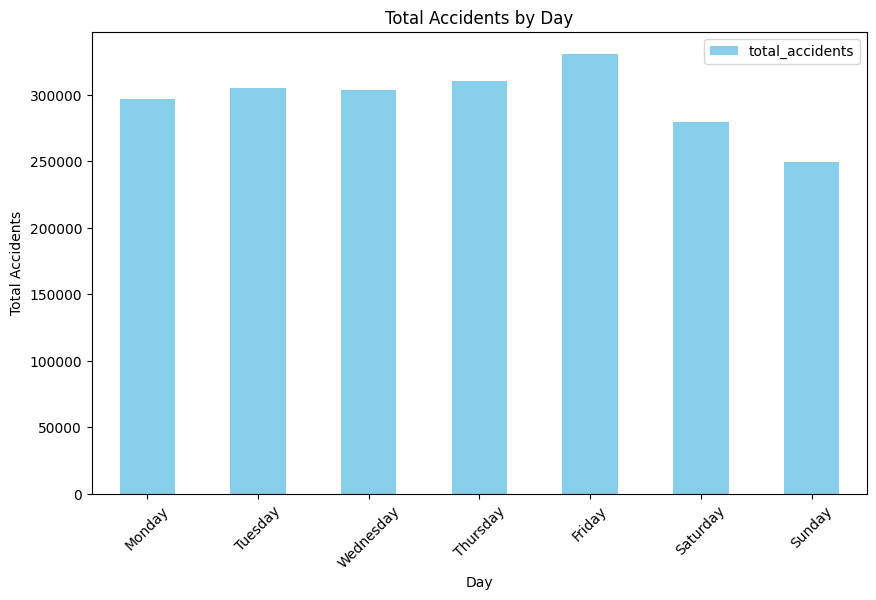

In [86]:
time_day_analysis.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Accidents by Day')
plt.xlabel('Day')
plt.ylabel('Total Accidents')
plt.xticks(rotation=45)
plt.show()


analysis : most accident happened on friday